In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
%matplotlib inline

In [2]:
data = pd.read_csv('../train.csv', index_col=0)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


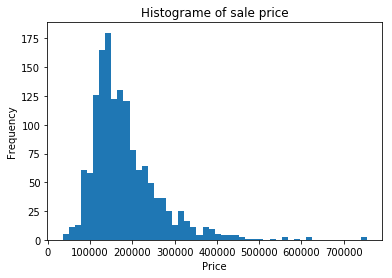

In [5]:
plt.hist(data.SalePrice, bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histograme of sale price');

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [4]:
data.Alley = data.Alley.fillna(value = 'NoAlley')
data.BsmtCond = data.BsmtCond.fillna(value = 'NoBsmt')
data.BsmtQual = data.BsmtQual.fillna(value = 'NoBsmt')
data.BsmtExposure = data.BsmtExposure.fillna(value= 'NoBsmt')
data.BsmtFinType1 = data.BsmtFinType1.fillna(value= 'NoBsmt')
data.BsmtFinType2 = data.BsmtFinType2.fillna(value= 'NoBsmt')
data.LotFrontage = data.LotFrontage.fillna(value = 0)
data.FireplaceQu = data.FireplaceQu.fillna(value = 'Nofireplace')
data.GarageType = data.GarageType.fillna(value = 'NoGarage')
data.GarageCond = data.GarageCond.fillna(value = 'NoGarage')
data.GarageFinish = data.GarageFinish.fillna(value = 'NoGarage')
data.GarageYrBlt = data.GarageYrBlt.fillna(value = 0)           
data.GarageQual = data.GarageQual.fillna(value = 'NoGarage')

data.PoolQC = data.PoolQC.fillna(value = 'NoPool')
data.Fence = data.Fence.fillna(value = 'NoFence')
data.MiscFeature = data.MiscFeature.fillna(value = 'NoMisc')
data.MasVnrType = data.MasVnrType.fillna(value = 'noMas')
data.MasVnrArea = data.MasVnrArea.fillna(value = 'noMas')

data.info()
 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 no

In [9]:
n_data = pd.get_dummies(data)

In [10]:
n_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Columns: 631 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(2), int64(34), uint8(595)
memory usage: 1.2 MB


In [11]:
n_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
n_data.to_csv('../clean_data.csv')

In [ ]:
data.to_csv('../semi_clean_data.csv')